In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('../data/global_military_firepower_2025.csv')
print(df.head())
print(df.info())


   rank        country         region  total_population  \
0     1  United States  North America         341963408   
1     2         Russia           Asia         140820810   
2     3          China           Asia        1415043270   
3     4          India           Asia        1409128296   
4     5    South Korea           Asia          52081799   

   total_military_manpower  fit_for_service  \
0                150463900        124816644   
1                 69002197         46189226   
2                764123366        626864169   
3                662290299        522786598   
4                 26040900         21353538   

   population_reaching_military_age_annually  active_personnel  \
0                                    4445524           1328000   
1                                    1267387           1320000   
2                                   19810606           2035000   
3                                   23955181           1455550   
4                               

In [101]:
df["total_naval_fleet_tonnage_mt"] = df["total_naval_fleet_tonnage_mt"].fillna(0)

In [102]:
mean_tonnage = df[df["total_naval_fleet_tonnage_mt"].notna()]["total_naval_fleet_tonnage_mt"].mean()
df["total_naval_fleet_tonnage_mt"] = df["total_naval_fleet_tonnage_mt"].fillna(mean_tonnage)

In [103]:
df_naval = df.dropna(subset=["total_naval_fleet_tonnage_mt"])

In [104]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 rank                                         0
country                                      0
region                                       0
total_population                             0
total_military_manpower                      0
fit_for_service                              0
population_reaching_military_age_annually    0
active_personnel                             0
reserve_personnel                            0
paramilitary                                 0
total_military_aircraft                      0
fighter_aircraft                             0
attack_aircraft                              0
transport_aircraft                           0
trainer_aircraft                             0
special_mission_aircraft                     0
tanker_aircraft                              0
total_military_helicopters                   0
attack_helicopters                           0
tanks                                        0
armored_fighting_vehicles                  

In [105]:
# Top 10 most powerful countries based on global military ranking
top_10 = df.head(10)[["rank", "country"]]
print(top_10)

   rank         country
0     1   United States
1     2          Russia
2     3           China
3     4           India
4     5     South Korea
5     6  United Kingdom
6     7          France
7     8           Japan
8     9         Turkiye
9    10           Italy


In [106]:
# Total number of active military personnel by region
active_by_region = df.groupby("region")["active_personnel"].sum()
print(active_by_region)

region
Africa            2735105
Asia             13351900
Europe            2832616
North America     2133489
Oceania             66020
South America     1194100
Name: active_personnel, dtype: int64


In [107]:
# Average number of tanks by region
avg_tanks_by_region = df.groupby("region")["tanks"].mean()
print(avg_tanks_by_region)

region
Africa           226.263158
Asia             988.200000
Europe           177.157895
North America    448.818182
Oceania           29.500000
South America    143.000000
Name: tanks, dtype: float64


In [108]:
# Top 10 countries with the highest defense budgets
top_defense_budget = df.nlargest(10, "defense_budget_usd")[["country", "defense_budget_usd"]]
print(top_defense_budget)

           country  defense_budget_usd
0    United States        8.950000e+11
2            China        2.668500e+11
1           Russia        1.260000e+11
3            India        7.500000e+10
23    Saudi Arabia        7.476000e+10
5   United Kingdom        7.150054e+10
7            Japan        5.700000e+10
17       Australia        5.570000e+10
6           France        5.500000e+10
19         Ukraine        5.370000e+10


In [109]:
# Top 10 countries with the highest defense budgets
top_defense_budget = df.nlargest(10, "defense_budget_usd")[["country", "defense_budget_usd"]]
print(top_defense_budget)

           country  defense_budget_usd
0    United States        8.950000e+11
2            China        2.668500e+11
1           Russia        1.260000e+11
3            India        7.500000e+10
23    Saudi Arabia        7.476000e+10
5   United Kingdom        7.150054e+10
7            Japan        5.700000e+10
17       Australia        5.570000e+10
6           France        5.500000e+10
19         Ukraine        5.370000e+10


In [110]:
# Number of fighter aircraft by country (Top 10)
fighter_by_country = df[["country", "fighter_aircraft"]].sort_values(by="fighter_aircraft", ascending=False).head(10)
print(fighter_by_country)

          country  fighter_aircraft
0   United States              1790
2           China              1212
1          Russia               833
3           India               513
33    North Korea               368
11       Pakistan               328
4     South Korea               315
21         Taiwan               285
23   Saudi Arabia               283
14         Israel               240


In [111]:
# Total number of naval vessels by region
naval_by_region = df.groupby("region")["total_naval_fleet"].sum()
print(naval_by_region)

region
Africa            905
Asia             5156
Europe           2111
North America     931
Oceania            52
South America     776
Name: total_naval_fleet, dtype: int64


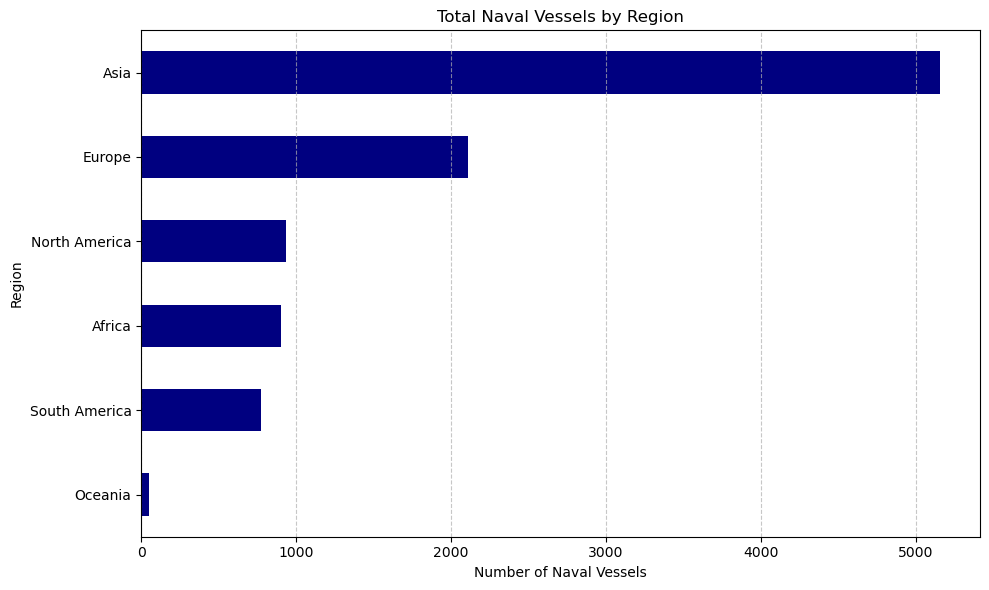

In [112]:
plt.figure(figsize=(10, 6))
naval_by_region.sort_values().plot(kind="barh", color="navy")
plt.title("Total Naval Vessels by Region")
plt.xlabel("Number of Naval Vessels")
plt.ylabel("Region")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [113]:
# Proven oil reserves sorted by rank
oil_reserves_by_rank = df[["rank", "country", "proven_oil_reserves_bbl"]].sort_values(by="rank")
print(oil_reserves_by_rank.head(10))

   rank         country  proven_oil_reserves_bbl
0     1   United States             3.821200e+10
1     2          Russia             8.000000e+10
2     3           China             2.602300e+10
3     4           India             4.605000e+09
4     5     South Korea             0.000000e+00
5     6  United Kingdom             2.500000e+09
6     7          France             6.171900e+07
7     8           Japan             4.411500e+07
8     9         Turkiye             3.660000e+08
9    10           Italy             4.979340e+08


In [114]:
# Top 10 countries by number of attack aircraft
top_attack_aircraft = df.nlargest(10, "attack_aircraft")[["country", "attack_aircraft"]]
print(top_attack_aircraft)

          country  attack_aircraft
0   United States              889
1          Russia              689
2           China              371
3           India              130
33    North Korea              114
4     South Korea               98
11       Pakistan               90
18          Egypt               90
23   Saudi Arabia               81
9           Italy               67


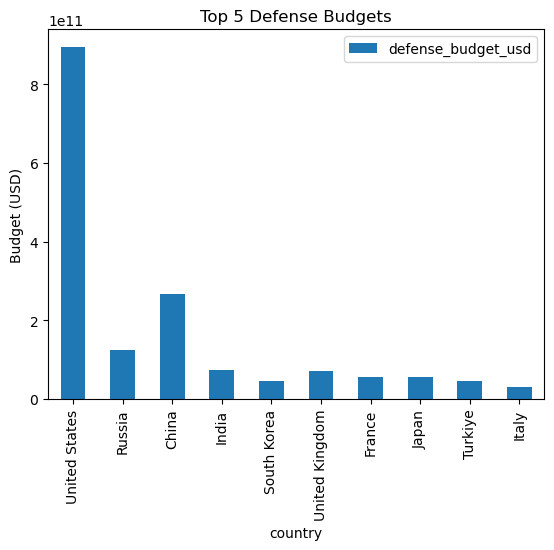

In [115]:
# top 10 defense budgets by country
import matplotlib.pyplot as plt
df.head(10)[["country", "defense_budget_usd"]].plot(x="country", y="defense_budget_usd", kind="bar")
plt.title("Top 5 Defense Budgets")
plt.ylabel("Budget (USD)")
plt.show()

In [116]:
# Average number of military helicopters by region
avg_helicopters_by_region = df.groupby("region")["total_military_helicopters"].mean()
print(avg_helicopters_by_region)


region
Africa            43.184211
Asia             204.911111
Europe            79.157895
North America    574.818182
Oceania           45.000000
South America     85.090909
Name: total_military_helicopters, dtype: float64


In [117]:
# Top 10 countries by number of people fit for military service
fit_by_country = df[["country", "fit_for_service"]].sort_values(by="fit_for_service", ascending=False).head(10)
print(fit_by_country)


          country  fit_for_service
2           China        626864169
3           India        522786598
0   United States        124816644
12      Indonesia        114595923
30        Nigeria         90437404
10         Brazil         88680759
11       Pakistan         85803614
34     Bangladesh         66129296
31         Mexico         49811912
1          Russia         46189226


In [118]:
# Total reserve personnel by region
reserve_by_region = df.groupby("region")["reserve_personnel"].sum()
print(reserve_by_region)


region
Africa            1186350
Asia             21040300
Europe            4739880
North America     1126005
Oceania             35300
South America     1134500
Name: reserve_personnel, dtype: int64


In [119]:
# Top 10 countries by number of military transport aircraft
top_transport = df.nlargest(10, "transport_aircraft")[["country", "transport_aircraft"]]
print(top_transport)

          country  transport_aircraft
0   United States                 918
1          Russia                 456
2           China                 289
3           India                 270
6          France                 119
10         Brazil                 109
15           Iran                  87
45       Colombia                  86
8         Turkiye                  84
12      Indonesia                  70


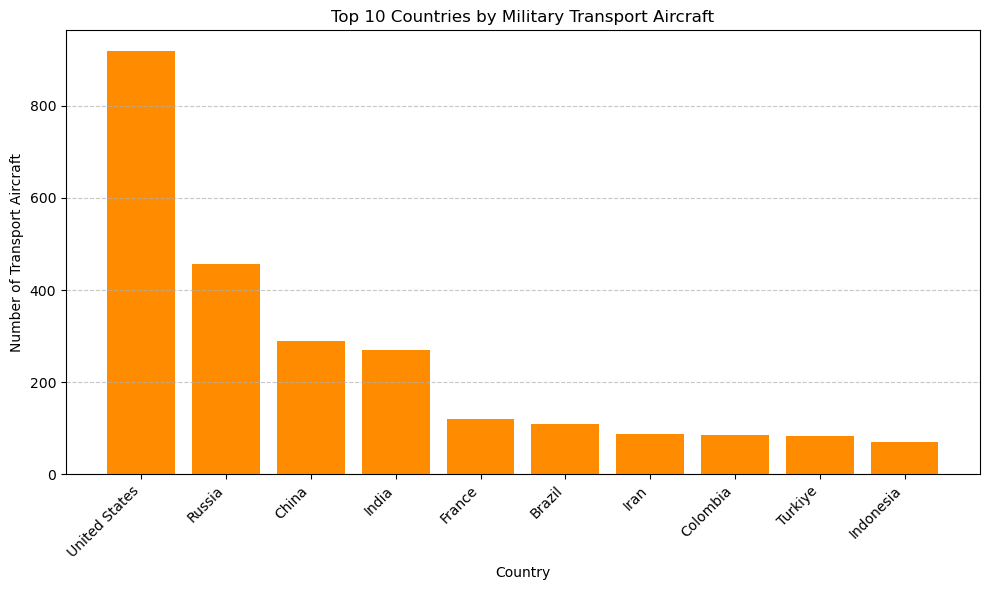

In [120]:
plt.figure(figsize=(10, 6))
plt.bar(top_transport["country"], top_transport["transport_aircraft"], color="darkorange")
plt.title("Top 10 Countries by Military Transport Aircraft")
plt.xlabel("Country")
plt.ylabel("Number of Transport Aircraft")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [121]:
# Natural resources vs military rank (Top 10)
resource_impact = df[["rank", "proven_oil_reserves_bbl", "proven_coal_reserves_cum"]].head(10)
print(resource_impact)

   rank  proven_oil_reserves_bbl  proven_coal_reserves_cum
0     1             3.821200e+10              2.489410e+11
1     2             8.000000e+10              1.621660e+11
2     3             2.602300e+10              1.431970e+11
3     4             4.605000e+09              1.110520e+11
4     5             0.000000e+00              3.260000e+08
5     6             2.500000e+09              2.600000e+07
6     7             6.171900e+07              1.600000e+08
7     8             4.411500e+07              3.500000e+08
8     9             3.660000e+08              1.152500e+10
9    10             4.979340e+08              6.099990e+08


In [122]:
# Top 10 countries by total land area (sq km)
top_land_area = df.nlargest(10, "total_land_area_sq_km")[["country", "total_land_area_sq_km"]]
print(top_land_area)

          country  total_land_area_sq_km
1          Russia               17098242
27         Canada                9984670
0   United States                9833517
2           China                9596960
10         Brazil                8515770
17      Australia                7741220
3           India                3287263
32      Argentina                2780400
56     Kazakhstan                2724900
25        Algeria                2381740


In [123]:
# Number of submarines by region
subs_by_region = df.groupby("region")["submarines"].sum()
print(subs_by_region)

region
Africa            17
Asia             286
Europe            60
North America     74
Oceania            6
South America     21
Name: submarines, dtype: int64


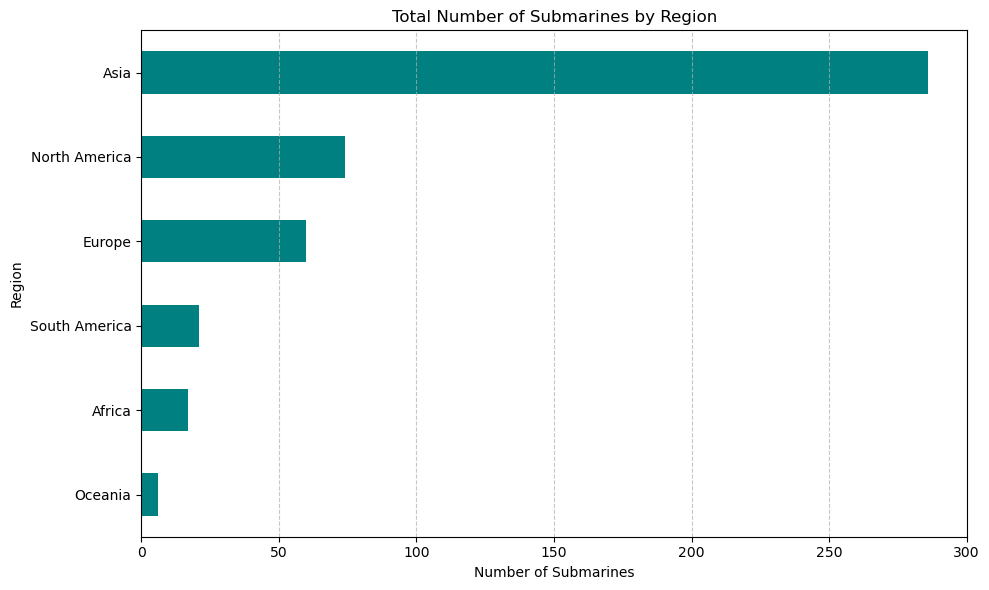

In [124]:
plt.figure(figsize=(10, 6))
subs_by_region.sort_values().plot(kind="barh", color="teal")
plt.title("Total Number of Submarines by Region")
plt.xlabel("Number of Submarines")
plt.ylabel("Region")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [125]:
# Average naval tonnage (weight capacity) by country (Top 10)
avg_naval_tonnage = df.groupby("country")["total_naval_fleet_tonnage_mt"].mean().sort_values(ascending=False).head(10)
print(avg_naval_tonnage)

country
United States     4168037.0
China             2857143.0
Russia            1260447.0
Japan              769882.0
India              593603.0
France             428765.0
United Kingdom     394043.0
Italy              359417.0
South Korea        344786.0
Turkiye            325729.0
Name: total_naval_fleet_tonnage_mt, dtype: float64


In [126]:
# Top 10 countries with most major seaports
ports_by_country = df[["country", "major_ports_and_terminals"]].sort_values(by="major_ports_and_terminals", ascending=False).head(10)
print(ports_by_country)


           country  major_ports_and_terminals
0    United States                        666
27          Canada                        284
5   United Kingdom                        185
7            Japan                        163
37          Norway                        141
12       Indonesia                        123
9            Italy                        123
26          Sweden                         92
40     Philippines                         70
44         Denmark                         69


In [127]:
# Top 10 countries with most tanks
top_tanks = df.nlargest(10, "tanks")[["country", "tanks"]]
print(top_tanks)

          country  tanks
2           China   6800
1          Russia   5750
0   United States   4640
33    North Korea   4344
3           India   4201
18          Egypt   3620
11       Pakistan   2627
8         Turkiye   2238
4     South Korea   2236
15           Iran   1713


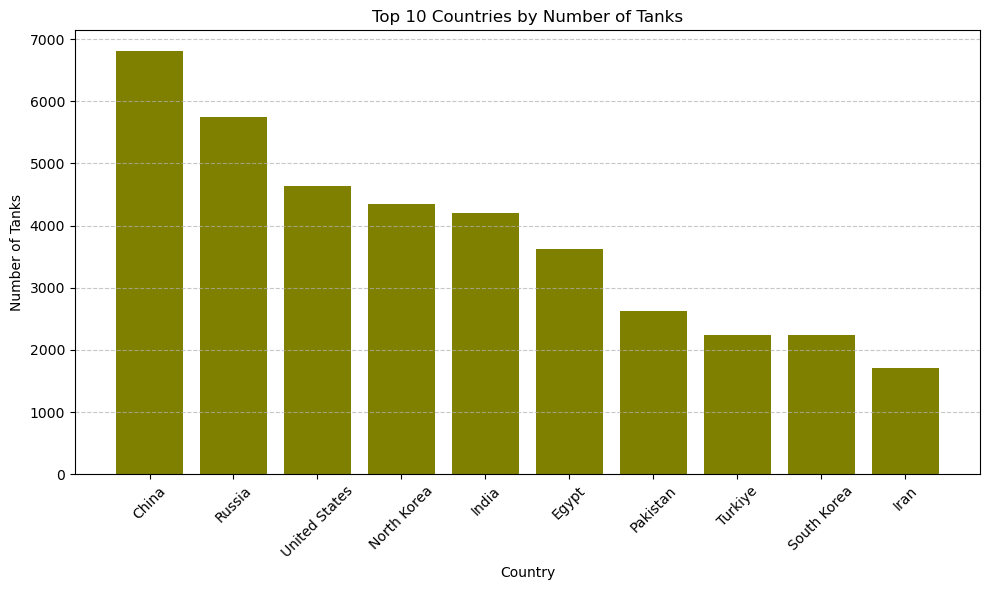

In [128]:
plt.figure(figsize=(10, 6))
plt.bar(top_tanks["country"], top_tanks["tanks"], color="olive")
plt.title("Top 10 Countries by Number of Tanks")
plt.xlabel("Country")
plt.ylabel("Number of Tanks")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [129]:
# Total defense budget by region
budget_by_region = df.groupby("region")["defense_budget_usd"].sum()
print(budget_by_region)

region
Africa           7.006121e+10
Asia             8.851772e+11
Europe           4.900391e+11
North America    9.511152e+11
Oceania          5.873000e+10
South America    7.161092e+10
Name: defense_budget_usd, dtype: float64


In [130]:
# Top 10 countries with the most armored fighting vehicles
top_afv = df.nlargest(10, "armored_fighting_vehicles")[["country", "armored_fighting_vehicles"]]
print(top_afv)

          country  armored_fighting_vehicles
0   United States                     391963
3           India                     148594
2           China                     144017
1          Russia                     131527
6          France                     110932
13        Germany                      83260
9           Italy                      73480
15           Iran                      65825
29         Greece                      61888
8         Turkiye                      61173


In [131]:
# Countries with shared borders longer than 10,000 km
high_border = df[df["border_coverage_km"] > 10000][["country", "border_coverage_km"]]
print(high_border)

                             country  border_coverage_km
0                      United States               12002
1                             Russia               22407
2                              China               22457
3                              India               13888
10                            Brazil               16145
32                         Argentina               11968
56                        Kazakhstan               13364
65  Democratic Republic of the Congo               10481


In [132]:
# Effect of number of attack helicopters on global ranking
heli_impact = df[["rank", "attack_helicopters"]].sort_values(by="rank").head(10)
print(heli_impact)

   rank  attack_helicopters
0     1                1002
1     2                 557
2     3                 281
3     4                  80
4     5                 111
5     6                  37
6     7                  68
7     8                 119
8     9                 111
9    10                  37


In [133]:
# Top 10 countries in coal production
top_coal = df.nlargest(10, "coal_production_cum")[["country", "coal_production_cum"]]
print(top_coal)

          country  coal_production_cum
2           China           4827000000
3           India            985671000
12      Indonesia            659357000
0   United States            548849000
1          Russia            508190000
17      Australia            465865000
39   South Africa            245467000
13        Germany            138981000
56     Kazakhstan            118195000
20         Poland            116682000


Top 10 Countries in Coal Production (Cumulative):
          country  coal_production_cum
2           China           4827000000
3           India            985671000
12      Indonesia            659357000
0   United States            548849000
1          Russia            508190000
17      Australia            465865000
39   South Africa            245467000
13        Germany            138981000
56     Kazakhstan            118195000
20         Poland            116682000


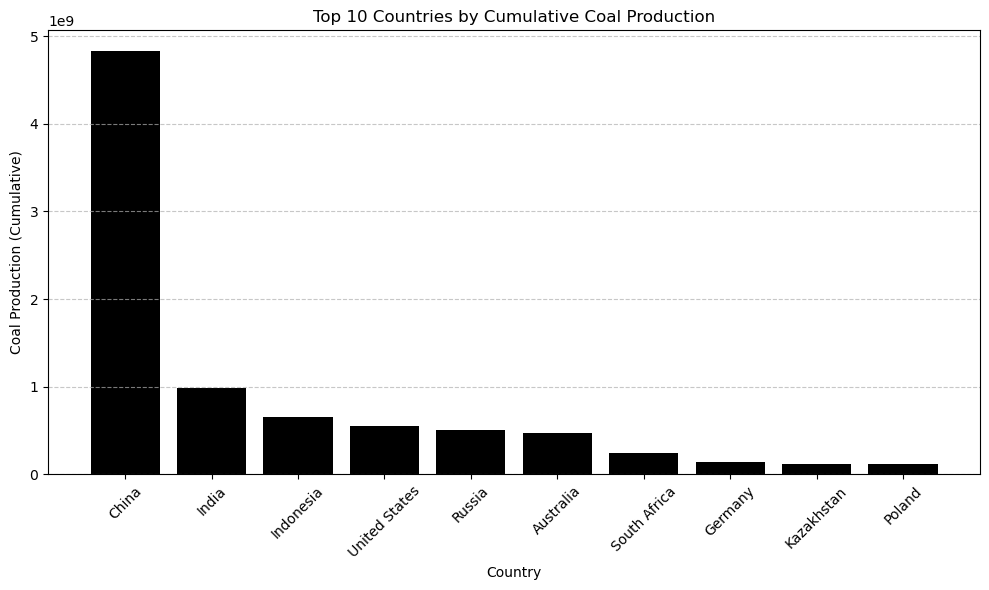

In [134]:
top_coal = df.nlargest(10, "coal_production_cum")[["country", "coal_production_cum"]]
print("Top 10 Countries in Coal Production (Cumulative):")
print(top_coal)

plt.figure(figsize=(10, 6))
plt.bar(top_coal["country"], top_coal["coal_production_cum"], color="Black")
plt.title("Top 10 Countries by Cumulative Coal Production")
plt.xlabel("Country")
plt.ylabel("Coal Production (Cumulative)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()